# SIT731 - Task 2P
## Monique Senjaya, S224780456, [s224780456@deakin.edu.au](mailto:s224780456@deakin.edu.au), Postgraduate Student 
---

In this second task, we are required to showcase our ability to make use of `numpy` to display data and evaluate it based on the .csv file that we have. This exercise will make use of data collected from Yahoo Finance website that contains `365` numerical data of daily close BTC-to-USD in the year 2023. This task consists of numpy tasks like:
- Importing data from csv file into numpy vector
- Use the numpy vector and take the data from Q3
- Use numpy functions to display various statistics calculated from the data. This includes:
    - Arithmetic mean
    - Minimum
    - First quartile
    - Median
    - Third quartile
    - Maximum
    - Standard deviation
    - Interquartile range
- Draw a line graph using the Q3 data
- Determine the day numbers with lowest and highes prices
- Use the whole coding concepts to remake it for Q1, Q2, and Q4
- Discuss and evaluate all 4 plots
- Draw a horizontal box-and-whisker plot for Q3
- Count the amount of outliers in the boxplot.
- Explain what the outliers might mean

Other than showcasing technical coding skills, this task also covers our ability to analyze and discuss the differences in plots of Q1-4. We are also expected to explain the graph plots we made and explain what the outliers in the data might mean in the current context.

### Import numpy and load .csv data
---

First, let's import numpy into our notebook. We will then use this to load data from our csv file by making use of the function `loadtxt()`.

In [1]:
import numpy as np

rates = np.loadtxt("BTC-USD.csv")

### Splitting the dataset into quarters
---

Once we have done this, before we can do any calculation, let's split the data. We'll make a new variable to store data of BTC-to-USD in Q3 of 2023. We will be doing this using a function `split_data`. This takes in a parameter `data` and `quarter`.

In [2]:
def split_data(quarter, data):
    """
    A function to split the data based
    on the quarter parameter.

    Parameters:
    - quarter: int (1, 2, 3, 4) or "full" for the entire year.
    - data: numpy array containing Bitcoin price data for the year.
    """
    if quarter == 1:
        return data[0:91]
    elif quarter == 2: 
        return data[91:181]
    elif quarter == 3:
        return data[181:273]
    elif quarter == 4:
        return data[273:364]
    else:
        return "Invalid quarter! Enter a number between 1 to 4."


### Calculate statistical data from Q3
---

Now that we have the `split_data` function we will use this to extract the data of Q3 and use formulas to calculate the aggregates mentioned above. We will first calculate everything and store it in a variable before printing it.

In [3]:
current_data = split_data(3, rates)

#### Artihmetic mean
---
We will make use of the `.mean()` function from numpy to calculate the arithmetic mean.

In [4]:
mean = np.mean(current_data)

#### Minimum
---
We will make use of the `.min()` function from numpy to calculate the minimum value.

In [5]:
min = np.min(current_data)

#### Quartile 1
---
We will make use of the `.quantile()` function from numpy to calculate the value of quartile 1. We will use `.25` for the parameter because Q1 is the 25th percentile of the data.

In [6]:
q1 = np.quantile(current_data, .25)

#### Median
---
We will make use of the `.median()` function from numpy to calculate the value of median.

In [7]:
median = np.median(current_data)

#### Quartile 3
---
We will make use of the `.quantile()` function from numpy to calculate the value of quartile 3. We will use `.75` for the parameter because Q3 is the 75th percentile of the data.

In [8]:
q3 = np.quantile(current_data, .75)

#### Maximum
---
We will make use of the `.max()` function from numpy to calculate the value of maximum in quarter 3.

In [9]:
max = np.max(current_data)

#### Standard Deviation
---
We will make use of the `.std()` function fromnumpy to calculate the value of standard deviation throughout the data in quarter 3.

In [10]:
std = np.std(current_data)

#### Interquartile range
---

We will simply use the value of `q3` and subtract that by the value of `q1` to get the result of the IQR.

In [11]:
iqr = q3 - q1

### Display the values in a readable manner

After making variables to store all of the values, it is now time to display them as a result. To make sure it is readable, we will keep the spacing consistent and make the decimals rounded off to 2 significant figures by using `.2f` when formatting the print results.

In [12]:
print(f"Data Statistics of BTC-to-USD for Quarter 3 of 2023")

print(f"## Arithmetic mean    :   {mean:.2f}")
print(f"## Minimum            :   {min:.2f}")
print(f"## Q1                 :   {q1:.2f}")
print(f"## Median             :   {median:.2f}")
print(f"## Q3                 :   {q3:.2f}")
print(f"## Maximum            :   {max:.2f}")
print(f"## Standard Deviation :   {std:.2f}")
print(f"## IQR                :   {iqr:.2f}")



Data Statistics of BTC-to-USD for Quarter 3 of 2023
## Arithmetic mean    :   28091.33
## Minimum            :   25162.65
## Q1                 :   26225.56
## Median             :   28871.82
## Q3                 :   29767.07
## Maximum            :   31476.05
## Standard Deviation :   1827.04
## IQR                :   3541.51


The results above shows a very readable display of all the data statistics for Quarter 3 of 2023.

### Drawing line graph

Now, let's make a function to plot the data using `matplotlib` to see what it looks like and try to evaluate the looks of the graph. We will make a function called `plot_btc_prices` that takes in two parameters: `quarter` and `data`. This will be used to provide labels, data, and details for the plot. This function will make the code reusable for future dates.

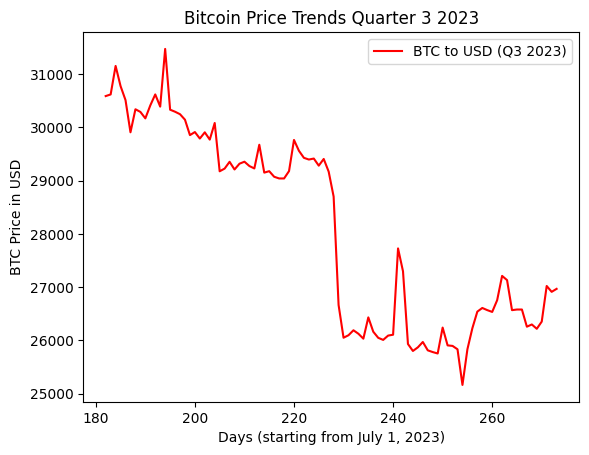

In [13]:
import matplotlib.pyplot as plt

def plot_btc_prices(quarter, data):
    """
    Plots Bitcoin prices for a given quarter or full year.

    Parameters:
    - quarter: int (1, 2, 3, 4) or "full" for the entire year.
    - data: numpy array containing Bitcoin price data for the year.
    """

    # Make a dictionary to be referenced as days in a quarter
    quarter_days = {
        1: (1, 91),   
        2: (91, 182), 
        3: (182, 274),
        4: (274, 366)
    }

    colors = {1: 'b-', 2: 'g-', 3: 'r-', 4: 'c-', "full": 'm-'}  # Another dictionary for color

    if quarter == "full":
        start_day, end_day = 1, 366
        label = "BTC to USD (2023)"
    else:
        start_day, end_day = quarter_days[quarter]
        label = f"BTC to USD (Q{quarter} 2023)"

    days_x = np.arange(start_day, end_day) 
    rates_y = data[start_day-1:end_day-1]

    plt.plot(days_x, rates_y, colors[quarter], label=label)  # Plot with different colors


plot_btc_prices(3, rates)
plt.title("Bitcoin Price Trends Quarter 3 2023")
plt.xlabel("Days (starting from July 1, 2023)")
plt.ylabel("BTC Price in USD")
plt.legend()
plt.show()

### Graph reading and conclusion
---

The plot above shows how BTC price changed from July 1 to September 30 in the year 2023. At the start of the quarter, the price was relatively high, fluctuating around $30,000 to $31,000. There are a few spikes and dips afterwards. Around day 220, which is late August, there is a significant drop in price. It reached below $27,000. This sudden drop might be linked to a major market event. After this dip, the price remains volatile, with a few spikes and drops. At the end of quarter 3, the graph shows a significant increase in price fluctuating between $25,000 and $27,500. This suggests that the market is uncertain and the investors are responding to external economic and crypto-related developments.

### Day Numbers of min and max values
---
To find the day numbers of min and max values, we will use the function `.argwhere` from numpy that returns the index of a certain value. We will make use of the previously stored min and max value and refer it to the `rates` array. Since arrays starts from index `0`, we will have to do a `+1` to find the actual day. 

In [14]:
lowest_day = 1 + np.argwhere(rates == min)[0][0]
highest_day = 1 + np.argwhere(rates == max)[0][0]

print(f"Lowest price was on day {lowest_day} {min:.2f}.")
print(f"Highest price was on day {highest_day} {max:.2f}.")

Lowest price was on day 254 25162.65.
Highest price was on day 194 31476.05.


### Using function to plot all quarters.

---

Since we already have a function to plot the data, we will make use of that to produce the data for all the quarters to compare the prices and analyse it. Thi function allows the boss to pick if she wants the graph for a specific quarter or the whole year.

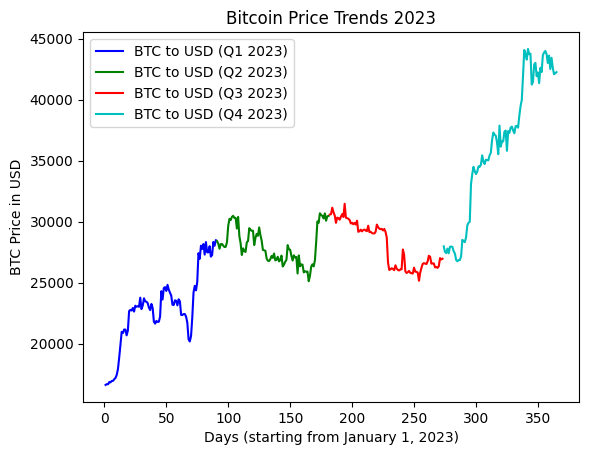

In [15]:
plot_btc_prices(1, rates)
plot_btc_prices(2, rates)
plot_btc_prices(3, rates)
plot_btc_prices(4, rates)

plt.title("Bitcoin Price Trends 2023")
plt.xlabel("Days (starting from January 1, 2023)")
plt.ylabel("BTC Price in USD")
plt.legend()
plt.show()

### Readings from the 2023 graph
---

The graph shows how Bitcoin’s price changed throughout 2023, with each quarter in a different color. From this, we can see some clear patterns:

- Q1 (Blue - January to March): Bitcoin started the year at a lower price but went up steadily. This suggests that investors were feeling more confident after 2022. There were some ups and downs, but overall, the price was rising.

- Q2 (Green - April to June): The price became more stable but still had some ups and downs. Unlike Q1, it didn’t rise as quickly. This could mean that people were being more careful, or that some investors were selling to take profits.

- Q3 (Red - July to September): This was the most difficult quarter, with a big drop in price, especially around August and September. This could be because of bad news in the market, government rules, or just fewer people buying Bitcoin at that time.

- Q4 (Cyan - October to December): Bitcoin made a strong comeback, reaching the highest prices of the year. This shows that more people were buying again, possibly because of good news, big investors getting involved, or just the usual year-end market trends.

Overall, we can conclude that Bitcoin in 2023 had a bit of a pattern. It first goes up, then it slows down in the middle, dropping for a bit, and then rising again at the end. This shows how the crypto market moves due to a few factor of investor feelings, news, and economic conditions.

## Postgraduate additional tasks

### Draw a box plot